<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total

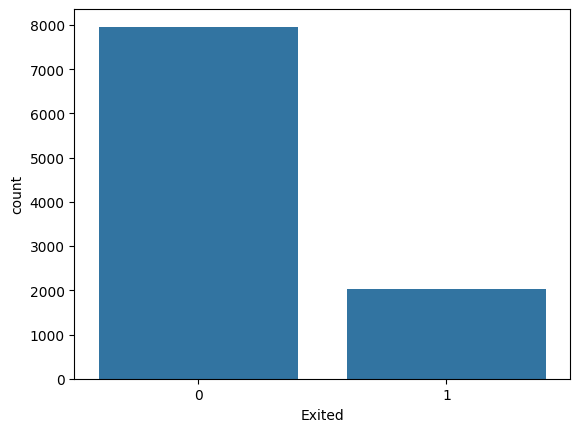

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

0.2907268170426065
0.19863013698630136
0.5790336115395083
[[2318   98]
 [ 468  116]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# 1. Data Preprocessing
file_name = 'Churn_Modelling.csv'

# Check if file exists, if not, prompt for upload
if not os.path.exists(file_name):
    print(f"File '{file_name}' not found. Please upload the file.")
    uploaded = files.upload()
    if file_name not in uploaded:
        raise FileNotFoundError(f"'{file_name}' was not uploaded. Please upload the correct file.")
    print(f"File '{file_name}' uploaded successfully.")

df = pd.read_csv(file_name) # Corrected filename
df.head()
df.info()
df.describe()
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()
df.info()
df.describe()
# Check for missing values
df.isnull().sum()

# 2. Feature Engineering
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Separate features x and target y
X = df.drop('Exited', axis=1)
y = df['Exited']
#data visualization
#  donot  chart for target variable
sns.countplot(x='Exited', data=df)
plt.show()
# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

# 5. Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
# 6. Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()
#eveluation f1 , recall, auc
from sklearn.metrics import f1_score, recall_score, roc_auc_score
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

#x and y axis  compare the performance of the model using data visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total

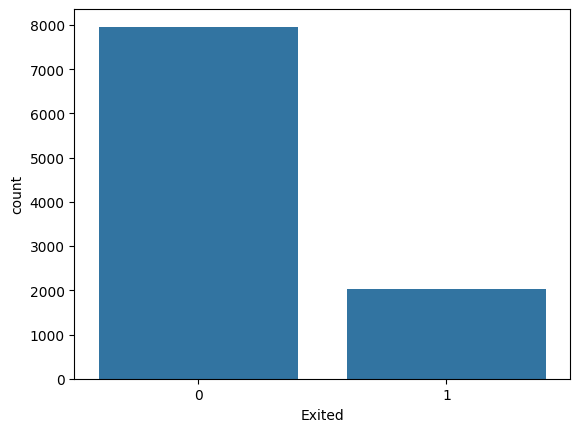

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

0.2907268170426065
0.19863013698630136
0.5790336115395083
[[2318   98]
 [ 468  116]]


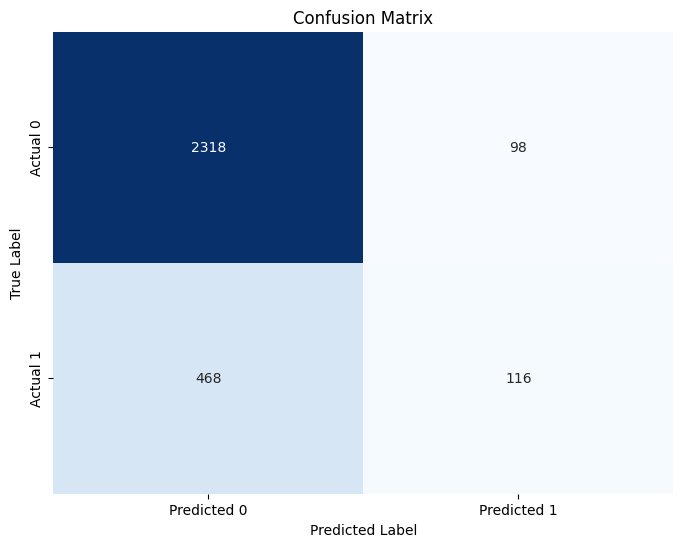

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# 1. Data Preprocessing
file_name = 'Churn_Modelling.csv'

# Check if file exists, if not, prompt for upload
if not os.path.exists(file_name):
    print(f"File '{file_name}' not found. Please upload the file.")
    uploaded = files.upload()
    if file_name not in uploaded:
        raise FileNotFoundError(f"'{file_name}' was not uploaded. Please upload the correct file.")
    print(f"File '{file_name}' uploaded successfully.")

df = pd.read_csv(file_name) # Corrected filename
df.head()
df.info()
df.describe()
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()
df.info()
df.describe()
# Check for missing values
df.isnull().sum()

# 2. Feature Engineering
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Separate features x and target y
X = df.drop('Exited', axis=1)
y = df['Exited']
#data visualization
#  donot  chart for target variable
sns.countplot(x='Exited', data=df)
plt.show()
# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

# 5. Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
# 6. Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()
#eveluation f1 , recall, auc
from sklearn.metrics import f1_score, recall_score, roc_auc_score
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [7]:
display(pd.DataFrame(X).head())

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
